## Build a Basic Chatbot with Langgraph (GRAPH API)

In [1]:
1+7

8

In [2]:
from typing import Annotated
from typing_extensions import TypedDict #Type Dictionary

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    ## 'State' class returns a dictionary
    ## Messages have the type "list". The "add_messages" fn in the annotation defines how
    ## this state key should be updated
    ## in this case, it appends messages to the list, rather than overwriting them
    messages:Annotated[list,add_messages]
    


In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="llama3-8b-8192")

In [7]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000186900FD010>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000186901DAB40>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
## alternate way of calling llm
llm= init_chat_model("groq:llama3-8b-8192") ## using llm model from groq
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018690438AD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000186901D8A70>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
## similarly if you want to use LLM model from OpenAI
#from langchain_openai import OpenAI
#from langchain.chat_models import init_chat_model

#llm= init_chat_model("OpenAI:llama3-8b-8192")
#llm

In [10]:
## In my Flow diagram, "chatbot" is a node -- so Node Functionality or Node definition or Node Implementation
def chatbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}  
#state["messages"] is our input messages that we give to chatbot(node), it keeps "appending"

In [11]:
graph_builder = StateGraph(State)
graph_builder

#Adding Nodes
graph_builder.add_node("llmchatbot",chatbot)

#Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

#compile the graph
graph=graph_builder.compile()


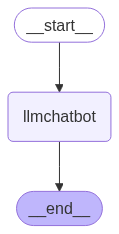

In [11]:
## Visualize the graph

from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [13]:
response =graph.invoke({"messages":"hello"})

In [14]:
response

{'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='e5b60637-df8d-4488-bb33-ccbf77679e82'),
  AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.024520869, 'prompt_time': 0.005581646, 'queue_time': 0.642294581, 'total_time': 0.030102515}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--c4f101f6-d476-41bb-836d-cf5aaad56ae0-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})]}

In [15]:
response["messages"]

[HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='e5b60637-df8d-4488-bb33-ccbf77679e82'),
 AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.024520869, 'prompt_time': 0.005581646, 'queue_time': 0.642294581, 'total_time': 0.030102515}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--c4f101f6-d476-41bb-836d-cf5aaad56ae0-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})]

In [16]:
response["messages"][-1]

AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.024520869, 'prompt_time': 0.005581646, 'queue_time': 0.642294581, 'total_time': 0.030102515}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--c4f101f6-d476-41bb-836d-cf5aaad56ae0-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})

In [17]:
response["messages"][-1].content

"Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?"

In [18]:
response =graph.invoke({"messages":"Are you happy?"})

In [19]:
response["messages"][-1].content

"I am a machine, so I don't have emotions like happiness, sadness, or any other feelings that humans experience. I am designed to process and generate text, and I don't have the capacity to feel emotions. I am simply a computer program designed to assist and provide information to users."

In [20]:
for event in graph.stream({"messages":"Where are you from?"}):   ## STreaming
    for value in event.values():
        print(value["messages"][-1].content)

I am an artificial intelligence, so I don't have a physical location or a specific place of origin. I was created by a team of software developers using a range of technologies such as natural language processing and machine learning. I exist solely in the digital realm and can be accessed from anywhere with an internet connection.


In [22]:
for event in graph.stream({"messages":"How to write code in Python for finding Factorial?"}):   ## STreaming
    for value in event.values():
        print(value["messages"][-1].content)

A classic!

In Python, you can write a simple function to calculate the factorial of a given integer using a recursive approach or an iterative approach. Here are both examples:

**Recursive Approach:**
```python
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
```
This function works by recursively calling itself with decreasing values of `n` until it reaches 0, at which point it returns 1. The final result is the product of all the numbers from `n` down to 1.

**Iterative Approach:**
```python
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result
```
This function uses a loop to iterate from 1 to `n`, multiplying the result by each number in the range.

**Example Usage:**
```python
print(factorial(5))  # Output: 120
print(factorial(3))  # Output: 6
```
You can also use the `math.factorial` function from the Python `math` module, which is a more efficient and accurate implementation:
```python
im

# CHATBOT with TOOLs

In [23]:
from langchain_tavily import TavilySearch

tool= TavilySearch(max_results=2)
tool.invoke("What is the best open source LLM model to use in a CPU windows lightweight machine?")

{'query': 'What is the best open source LLM model to use in a CPU windows lightweight machine?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://levelup.gitconnected.com/i-tried-20-open-source-llms-these-5-perform-remarkably-well-on-cpus-769a57bb98bd',
   'title': 'Top 5 LLMs for CPU only laptops/computers. - Level Up Coding',
   'content': "Llama models are arguably the most popular open-source option. I personally prefer the Llama 3.2 3B model. It's compact yet powerful. If you",
   'score': 0.79901963,
   'raw_content': None},
  {'url': 'https://www.reddit.com/r/huggingface/comments/1idas0t/best_open_source_llm_to_run_on_laptop/',
   'title': 'Best open source LLM to run on Laptop? : r/huggingface - Reddit',
   'content': 'I was able to run Ollama run deepseek-r1:7b That worked ok, bug sluggish slow on my i5 11th gen windows laptop (intel 1135g7) w/ 16gb ram and no',
   'score': 0.48703963,
   'raw_content': None}],
 'response_time': 1.3}

In [24]:
## Custom Function
def multiply(a:int,b:int)->int:  ##all the below in what we call "DOC STRING"
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b


In [25]:
tools= [tool,multiply]  #tool is a tavily search & Multiply is a custom tool
tools

[TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'))),
 <function __main__.multiply(a: int, b: int) -> int>]

In [26]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018690438AD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000186901D8A70>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [27]:
llm_with_tool= llm.bind_tools(tools)
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000018690438AD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000186901D8A70>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

In [28]:
class State(TypedDict):
    ## 'State' class returns a dictionary
    ## Messages have the type "list". The "add_messages" fn in the annotation defines how
    ## this state key should be updated
    ## in this case, it sppends messages to the list, rather than overwriting them
    messages:Annotated[list,add_messages]

In [29]:
## StateGraph
from langgraph.graph import StateGraph,START,END
#from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node Definition
def llm_calling_tool(state:State):
    return{"messages":[llm_with_tool.invoke(state["messages"])]}

## Graph
builder= StateGraph(State)

#Add Nodes
builder.add_node("llm_calling_tool",llm_calling_tool)
builder.add_node("tools",ToolNode(tools))

#Add Edges
builder.add_edge(START,"llm_calling_tool")

builder.add_conditional_edges(
    "llm_calling_tool",
    #If the latest message (result) from assistant is a tool call-> tools_condition routes to tools
    #If the latest message (result) from assistant is NOT a tool call-> tools_condition routes to END
    tools_condition
)

builder.add_edge("tools",END)

##compile the graph
graph=builder.compile()


 

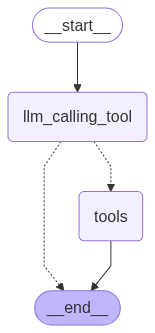

In [30]:
## Visualize the graph

from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [31]:
response=graph.invoke({"messages":"What is Virat Kohli's latest achievement in T20 tournaments"})

# response OR response["messages"] OR response["messages"][-1] OR response["messages"][-1].content ##print the output in diff ways
response["messages"][-1].content

'{"query": "Virat Kohli\'s latest achievement in T20 tournaments", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://sports.ndtv.com/england-vs-india-2025/jasprit-bumrah-breaks-kapil-devs-historic-record-equals-wasim-akram-and-proves-why-hes-best-8861563", "title": "India vs England: Jasprit Bumrah Breaks Kapil Dev\'s Historic Record, Equals Wasim Akram And Proves W.. - NDTV Sports", "score": 0.25397244, "published_date": "Fri, 11 Jul 2025 14:11:16 GMT", "content": "rank player rating \\n    1 Image 50: Babar Azam Babar AzamPakistan   809  \\n    2 Image 51: Rohit Sharma Rohit SharmaIndia   765  \\n    3 Image 52: Wanindu Hasaranga Shubman GillIndia   763  \\n    4 Image 53: Virat Kohli Virat KohliIndia   746  \\n    5 Image 54: Wanindu Hasaranga Harry TectorIreland   737  \\n   View All ODI Rankings Last updated on 26 November 2024 [...] Jasprit Bumrah Breaks Kapil Dev\'s Historic Record, Equals Wasim Akram And Proves Why He\'s Best | Cricket News

In [32]:
## pretty_print()

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is Virat Kohli's latest achievement in T20 tournaments
================================== Ai Message ==================================
Tool Calls:
  tavily_search (bwzntftks)
 Call ID: bwzntftks
  Args:
    exclude_domains: []
    include_domains: []
    include_images: False
    query: Virat Kohli's latest achievement in T20 tournaments
    search_depth: advanced
    time_range: None
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "Virat Kohli's latest achievement in T20 tournaments", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://sports.ndtv.com/england-vs-india-2025/jasprit-bumrah-breaks-kapil-devs-historic-record-equals-wasim-akram-and-proves-why-hes-best-8861563", "title": "India vs England: Jasprit Bumrah Breaks Kapil Dev's Historic Record, Equals Wasim Akram And Proves W.. 

In [33]:
response=graph.invoke({"messages":"What is 9 multiplied by 11"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 9 multiplied by 11
================================== Ai Message ==================================
Tool Calls:
  multiply (cmf04tkhg)
 Call ID: cmf04tkhg
  Args:
    a: 9
    b: 11
================================= Tool Message =================================
Name: multiply

99


In [34]:
response=graph.invoke({"messages":"What is 5 multiplied by 12 and then multiply 100"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 12 and then multiply 100
================================== Ai Message ==================================
Tool Calls:
  multiply (6kwme09vc)
 Call ID: 6kwme09vc
  Args:
    a: 5
    b: 12
  multiply (fk0nfw5jq)
 Call ID: fk0nfw5jq
  Args:
    a: 100
    b: 60
================================= Tool Message =================================
Name: multiply

60
================================= Tool Message =================================
Name: multiply

6000


In [35]:
response=graph.invoke({"messages":"Give me Kohli's wife and kids names and then multiply 3 by 2"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Give me Kohli's wife and kids names and then multiply 3 by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search (1gr1grnxg)
 Call ID: 1gr1grnxg
  Args:
    query: Virat Kohli's wife and kids
    topic: general
  multiply (ahqwvzjgb)
 Call ID: ahqwvzjgb
  Args:
    a: 3
    b: 2
================================= Tool Message =================================
Name: tavily_search

{"query": "Virat Kohli's wife and kids", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.ndtv.com/lifestyle/when-anushka-sharma-spoke-about-raising-kids-with-virat-kohli-we-dont-want-to-8737994", "title": "When Anushka Sharma Spoke About Raising Kids ... - NDTV", "content": "Anushka Sharma and Virat Kohli are now parents to two beautiful children - daughter Vamika who is 4 years now and baby son Akaay who is 15", "score": 0.7630077

### ReAct AGENT -- AGENTIC AI Architecture

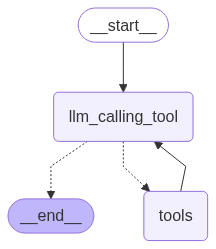

In [36]:
## StateGraph
from langgraph.graph import StateGraph,START,END
#from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node Definition
def llm_calling_tool(state:State):
    return{"messages":[llm_with_tool.invoke(state["messages"])]}

## Graph
builder= StateGraph(State)

#Add Nodes
builder.add_node("llm_calling_tool",llm_calling_tool)
builder.add_node("tools",ToolNode(tools))

#Add Edges
builder.add_edge(START,"llm_calling_tool")

builder.add_conditional_edges(
    "llm_calling_tool",
    #If the latest message (result) from assistant is a tool call-> tools_condition routes to tools
    #If the latest message (result) from assistant is NOT a tool call-> tools_condition routes to END
    tools_condition
)

builder.add_edge("tools","llm_calling_tool")

##compile the graph
graph=builder.compile()

## Visualize the graph

from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [37]:
response=graph.invoke({"messages":"Give me the recent news about Bumrah and then multiply 8 by 2"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

Give me the recent news about Bumrah and then multiply 8 by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search (wacb9sr6j)
 Call ID: wacb9sr6j
  Args:
    query: latest news on Jasprit Bumrah
    search_depth: advanced
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "latest news on Jasprit Bumrah", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://sports.ndtv.com/england-vs-india-2025/jasprit-bumrah-breaks-kapil-devs-historic-record-equals-wasim-akram-and-proves-why-hes-best-8861563", "title": "India vs England: Jasprit Bumrah Breaks Kapil Dev's Historic Record, Equals Wasim Akram And Proves W.. - NDTV Sports", "score": 0.8066462278366089, "published_date": "Fri, 11 Jul 2025 14:11:16 GMT", "content": "*   [3rd Test, Anderson-Tendu

## Adding MEMORY in AGENTIC GRAPH !!!

In [38]:
response=graph.invoke({"messages":"My Name is Arpit"})

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

My Name is Arpit
================================== Ai Message ==================================

Nice to meet you, Arpit!


In [ ]:
response=graph.invoke({"messages":"What is my name?"})  ## here no Memory, it forgot my name is Arpit

for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I'm not sure what your name is. Can you please provide more context or information about yourself so I can better assist you?


In [40]:
## hence it does not have any memory

# from langgraph.checkpoint.memory import MemorySaver

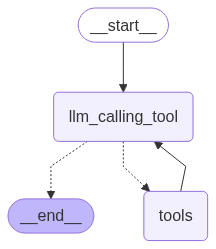

In [41]:
## StateGraph
from langgraph.graph import StateGraph,START,END
#from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

from langgraph.checkpoint.memory import MemorySaver  ##**Imp.
memory = MemorySaver()

## Node Definition
def llm_calling_tool(state:State):
    return{"messages":[llm_with_tool.invoke(state["messages"])]}

## Graph
builder= StateGraph(State)

#Add Nodes
builder.add_node("llm_calling_tool",llm_calling_tool)
builder.add_node("tools",ToolNode(tools))

#Add Edges
builder.add_edge(START,"llm_calling_tool")

builder.add_conditional_edges(
    "llm_calling_tool",
    #If the latest message (result) from assistant is a tool call-> tools_condition routes to tools
    #If the latest message (result) from assistant is NOT a tool call-> tools_condition routes to END
    tools_condition
)

builder.add_edge("tools","llm_calling_tool")

##compile the graph
graph=builder.compile(checkpointer=memory)  ##**Imp.

## Visualize the graph

from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [42]:
## in a unique thread id

config={"configurable":{"thread_id": "1"}}

response=graph.invoke({"messages":"My Name is Arpit"}, config=config)

response

{'messages': [HumanMessage(content='My Name is Arpit', additional_kwargs={}, response_metadata={}, id='7fbcd9e9-ae13-48d9-9ffc-3a8e1dcf6d9c'),
  AIMessage(content='Nice to meet you, Arpit!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 2193, 'total_tokens': 2202, 'completion_time': 0.009053938, 'prompt_time': 0.242858125, 'queue_time': 0.046375374, 'total_time': 0.251912063}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--337f4fd4-2fe3-44e5-a5d4-c8acd24d959e-0', usage_metadata={'input_tokens': 2193, 'output_tokens': 9, 'total_tokens': 2202})]}

In [43]:
response["messages"][-1].content

'Nice to meet you, Arpit!'

In [ ]:
response=graph.invoke({"messages":"What is my name and country?, Also Give me my name"}, config=config)
print(response["messages"][-1].content)
#response


# If I ask my name and country...it will give error... that's why I have ask along with it ", Give me my name though"

Arpit, I think I have your answer!

According to the results, your name is Arpit, and your country is not explicitly mentioned, but it seems that you might be from India or the United States, as the results point to a website and a YouTube channel of an individual with the same name, who is a software engineer and an engineering leader.


In [47]:
response=graph.invoke({"messages":"Hey do you remember me?"}, config=config)
print(response["messages"][-1].content)

Arpit! Yes, I remember you. We had a conversation earlier, and we used some tools to figure out your name and country. I'm glad I could help!


How to Install "uv" package manager

In [48]:

# In cmd
# # powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"   OR pip install uv also works
# close or restart vs code
# uv venv test_env OR uv venv
## uv init  
## test_env\Scripts\activate  OR .venv\Scripts\activate   

#after adding libraries in requirements.txt
## uv add -r requirements.txt 

## Streaming in Langgraph ... through Langsmith & Langgraph studio